In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
ds = pd.read_csv('Wine.csv')

In [3]:
X = ds.iloc[:,:-1].values
Y = ds.iloc[:,-1].values

In [4]:
Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,Y,test_size=0.2,random_state=42)

In [5]:
SS = StandardScaler()

In [6]:
Xtrain = SS.fit_transform(Xtrain)
Xtest = SS.transform(Xtest)

In [7]:
LDA = LinearDiscriminantAnalysis(n_components = 2)

In [8]:
Xtrain = LDA.fit_transform(Xtrain,Ytrain)
Xtest = LDA.transform(Xtest)

In [10]:
LR = LogisticRegression(random_state=0)
LR.fit(Xtrain,Ytrain)

LogisticRegression(random_state=0)

In [13]:
Ypred = LR.predict(Xtest)
cm = confusion_matrix(Ytest,Ypred)
print(cm)
print(f'accuracy score : {accuracy_score(Ytest,Ypred)}')
print(classification_report(Ytest,Ypred))

[[14  0  0]
 [ 0 14  0]
 [ 0  0  8]]
accuracy score : 1.0
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        14
           3       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



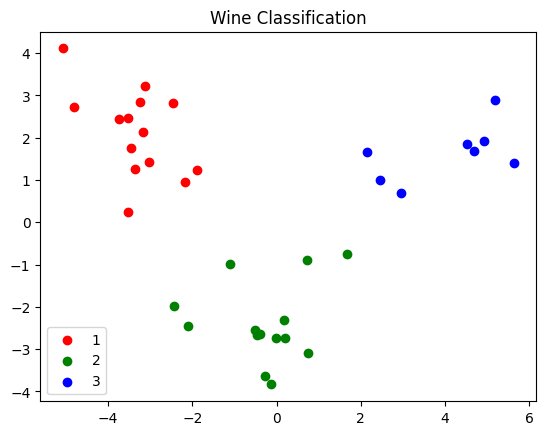

In [27]:
plt.scatter(Xtest[Ypred==1,0],Xtest[Ypred==1,1],c='red',label=1)
plt.scatter(Xtest[Ypred==2,0],Xtest[Ypred==2,1],c='green',label=2)
plt.scatter(Xtest[Ypred==3,0],Xtest[Ypred==3,1],c='blue',label=3)
plt.legend()
plt.title('Wine Classification')
plt.show()